In [2]:
import PIL
from matplotlib import pyplot as plt
import pandas
import cv2
import os
import shutil
from tqdm import tqdm
import numpy as np

In [2]:
name = "AAE_0003"

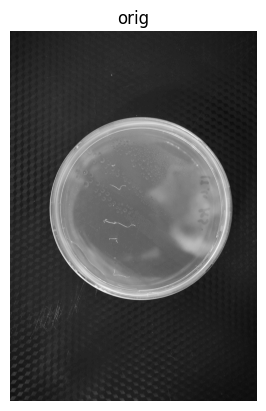

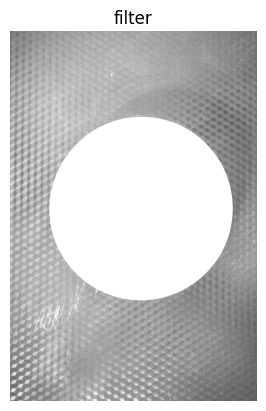

In [3]:
image = cv2.imread("arabidopsis/"+name+".JPG",cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0,-1,0], [-1,7,-1],[0,-1,0]])
laplasian = cv2.filter2D(image, -1, kernel)
#laplasian = PIL.Image.fromarray(laplasian)
plt.axis('off')
plt.imshow(image,cmap='gray')
plt.title("orig")
plt.show()
plt.axis('off')
plt.imshow(laplasian,cmap='gray')
plt.title("filter")
plt.show()

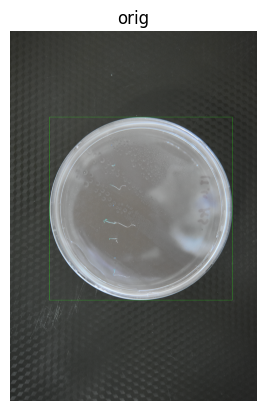

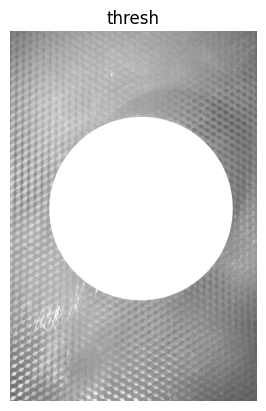

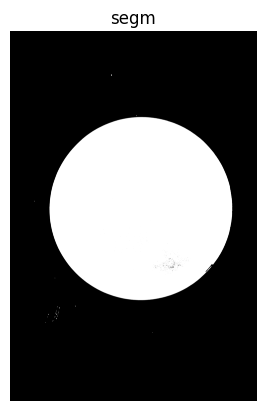

In [4]:
image = cv2.imread("arabidopsis/" + name + ".JPG")

original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours, obtain bounding box, extract and save ROI
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w > 500 and h > 500:
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        cv2.imwrite(name+'.png', ROI)
plt.axis('off')
plt.imshow(image,cmap='gray')
plt.title("orig")
plt.show()
plt.axis('off')
plt.imshow(laplasian,cmap='gray')
plt.title("thresh")
plt.show()
plt.axis('off')
plt.imshow(opening,cmap='gray')
plt.title("segm")
plt.show()

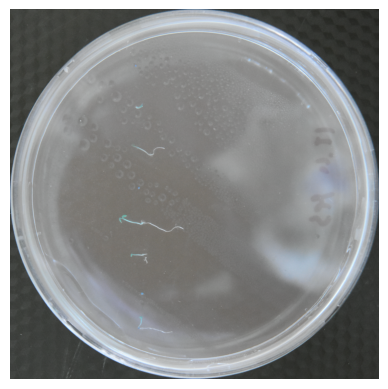

In [5]:
img = cv2.imread(name+".PNG")

plt.axis('off')
plt.imshow(img)

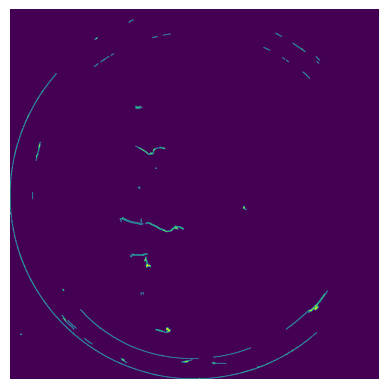

In [6]:
edges = cv2.dilate(cv2.Canny(img,0,255),None)

plt.axis('off')
plt.imshow(edges)

In [7]:
cv2.imwrite('edges_'+name+'.png', edges)

True

In [1]:
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True
